## Noel Alejandro Contreras Acosta
### Métodos de Integración numérica

### 1. Regla del Trapecio.
### El archivo velocidades.txt (adjunto), contiene dos columnas de numeros, la primera representa el tiempo t en segundos y la segunda la x-velocidad en metros por segundo de una partícula, medida una vez por segundo desde el tiempo t = 0 hasta t = 100. Las primeras líneas se ven así:
### 0 0
### 1 0.069478
### 2 0.137694
### 3 0.204332
### 4 0.269083
### 5 0.331656
### Escribe un programa para hacer lo siguiente:
### (a) Lee los datos y, usando la regla del trapecio, calcula a partir de ellos la distancia aproximada recorrida por la partícula en la dirección x como una funcion del tiempo.


In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
archivo=open('velocidades.txt', 'r')
velocidades=[]
for line in archivo:
    datos=line.split()
    datos=map(float, datos)
    datos=list(datos)
    velocidades.append(datos[1])
    
def velocidad(t):
    for i in velocidades:
        if t==velocidades.index(i):
            return i
            

   
def Trapecio(a,b,N):
    h=(b-a)/N
    I=h/2*(velocidad(a)+velocidad(b))
    for k in range(1,N+1):
        I+=h*velocidad(k)
    return f'La distancia aproximada recorrida por la partícula es {I} metros.'

Trapecio(0,100,100)
        

'La distancia aproximada recorrida por la partícula es 8.556232000000017 metros.'

### (b) Extiende tu programa para hacer una grafica que muestre, en el mismo gráfico, tanto la curva de velocidad original como la distancia recorrida como una función del tiempo.

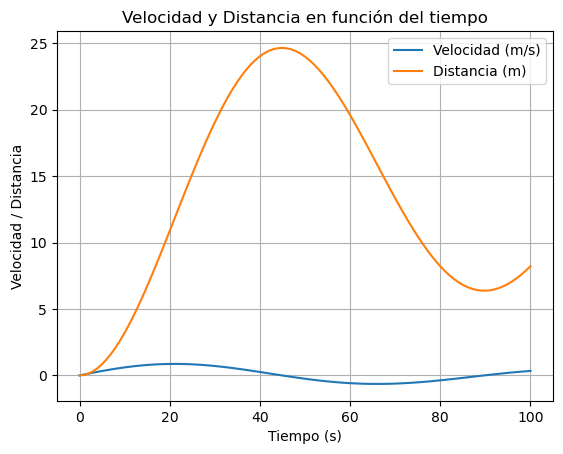

In [35]:

tiempo, velocidad = np.loadtxt('velocidades.txt', unpack=True)

distancia = np.cumsum((velocidad[:-1] + velocidad[1:]) / 2) # Calculamos la distancia usando la regla del trapecio

distancia = np.insert(distancia, 0, 0)  # Agregamos el punto inicial (0,0)

plt.plot(tiempo, velocidad, label='Velocidad (m/s)')
plt.plot(tiempo, distancia, label='Distancia (m)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad / Distancia')
plt.title('Velocidad y Distancia en función del tiempo')
plt.legend()
plt.grid(True)

### 2. El límite de difracción de un telescopio.
### Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de la luz en nuestros telescopios. La luz de las estrellas puede considerarse efectivamente como si proviniera de una fuente puntual en el infinito. Cuando dicha luz, con una longitud de onda λ, pasa a través de la apertura circular de un telescopio (que supondremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patrón de difracción circular que consta de un punto central rodeado por una serie de anillos concentricos. La intensidad de la luz en este patrón de difracción está dada por: 

$$
 I(r)= (\frac{J_1(kr)}{kr})^2
$$
### donde r es la distancia en el plano focal desde el centro del patron de difracción, k= 2π/λ y J1(x) es una función de Bessel. Las funciones de Bessel Jm(x) estan dadas por:
$$
J_m(x)= \frac{1}{\pi} \int_{0}^{\pi} cos(m\theta - xsen(\theta)) \, d\theta
$$
### donde m es un entero no negativo y x ≥ 0.
### (a) Escribe una función J(m,x) que calcule el valor de Jm(x) usando la regla de Simpson con N = 1000 puntos. Utiliza dicha función en un programa para graficar, en un solo grafico, las funciones de Bessel  ́J0, J1 y J2 como una función de x (de x = 0 a x = 20).

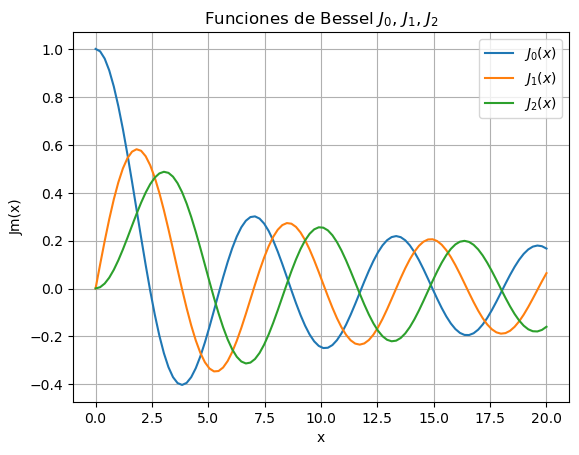

In [38]:
def J(m,x):   #Esta función calcula la función de Bessel usando la regla de Simpson con N=1000, a=0 y b=pi
    h=(np.pi)/1000
    I=h/2*(np.cos(m*np.pi-x*np.sin(np.pi))+1)
    for k in range(1,1001):
        I+=h*(np.cos(m*k-x*np.sin(k)))
    return (1/np.pi)*I

J_0=[] 
J_1=[]
J_2=[]
x_valores=np.linspace(0,20, 100) #Aquí se obtienen 100 puntos del intervalo [0,20].
for x in x_valores:  #aquí se calcula el valor de las funciones de Bessel con m=0,1,2 y variando en los puntos de arriba. Cada resultados se va
                     # agregando a su respectiva lista para así tener valores que graficar
    J_0.append(J(0,x))
    J_1.append(J(1,x))
    J_2.append(J(2,x))

plt.plot(x_valores,J_0, label='$J_0(x)$') #aquí se grafican las funciones de Bessel con todos los datos obtenidos anteriormente.
plt.plot(x_valores,J_1, label='$J_1(x)$')
plt.plot(x_valores,J_2, label='$J_2(x)$')
plt.grid()
plt.xlabel('x')
plt.ylabel('Jm(x)')
plt.title('Funciones de Bessel $J_0$, $J_1$, $J_2$' )
plt.legend()


    

### (b) Compara tus resultados con los proporcionados con la biblioteca de scipy que implementa la regla de Simpson.

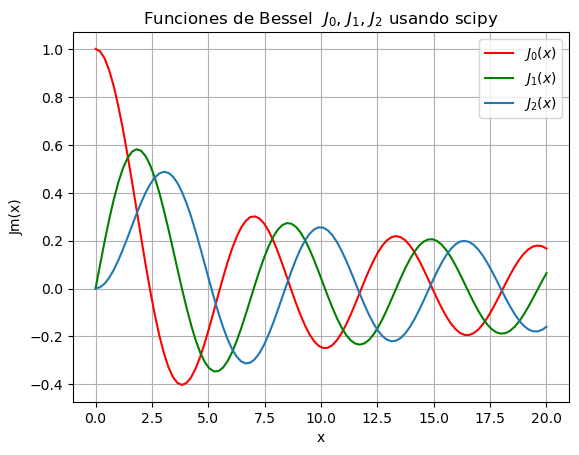

In [41]:
from scipy.integrate import simps
def Jb(m,x):
    Bess= np.cos(m*theta-x*np.sin(theta))
    theta=np.linspace(0,np.pi,1000)
    I=simps(Bess, theta)
    return 1/np.pi*I

J0=[] 
J1=[]
J2=[]
x_valores=np.linspace(0,20, 100) #Aquí se obtienen 100 puntos del intervalo [0,20].
for x in x_valores:  #aquí se calcula el valor de las funciones de Bessel con m=0,1,2 y variando en los puntos de arriba. Cada resultados se va
                     # agregando a su respectiva lista para así tener valores que graficar
    J0.append(J(0,x))
    J1.append(J(1,x))
    J2.append(J(2,x))

plt.plot(x_valores,J0,'r', label='$J_0(x)$') #aquí se grafican las funciones de Bessel con todos los datos obtenidos anteriormente.
plt.plot(x_valores,J1,'g', label='$J_1(x)$')
plt.plot(x_valores,J2, label='$J_2(x)$')
plt.grid()
plt.xlabel('x')
plt.ylabel('Jm(x)')
plt.title('Funciones de Bessel  $J_0$, $J_1$, $J_2$ usando scipy' )
plt.legend()


#Comparando, podemos ver que las gráficas son idénticas. Al momento de graficar, no hay diferencia entre usar la función simps que incluye scipy
# o usar la función que hemos creado nosotros. Aunque una posible diferencia sería la optimización computacional de una y otra 
# (aunque no lo sé en realidad).

### (c) Escribe un segundo programa que haga una gráfica de densidad (density plot) de la intensidad del patron de difracción circular de una fuente de luz puntual con λ = 500 nm, en una region cuadrada del plano focal, usando la fórmula dada anteriormente. Su imagen debe cubrir valores de r desde cero hasta aproximadamente 1 μm.

In [43]:
def Intensidad(r): #Esta función os devuelve la intensidad en función de r
    k=2*np.pi/500e-9
    I=(J(1,r*k)/r*k)**2
    return I

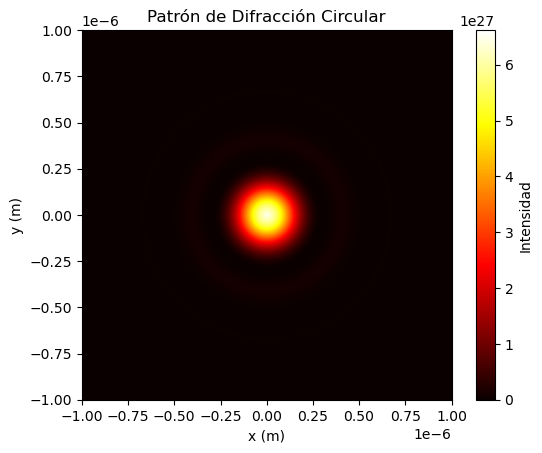

In [46]:
import numpy as np
import matplotlib.pyplot as plt

lambda1 = 500e-9  # Longitud de onda en metros (500 nm)
k = 2 * np.pi / lambda1  # Número de onda
x = np.linspace(-1e-6, 1e-6, 500)
y = np.linspace(-1e-6, 1e-6, 500)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

epsilon = 1e-20  # Aquí damos un valor pequeño para evitar división por cero
R[R == 0] = epsilon

plt.imshow(Intensidad(R), extent=(-1e-6, 1e-6, -1e-6, 1e-6), cmap='hot')
plt.title('Patrón de Difracción Circular')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar(label='Intensidad')
plt.show()

### 3. Capacidad calorífica de un sólido
### La teoría de sólidos de Debye dice que la capacidad calorífica de un sólido a una temperatura T está dada por:

$$
C_v=9V\rho k_B(\frac{T}{\theta_D})^3\int_0^{\theta_D/T}\frac{x^4e^x}{(e^x-1)^2} dx
$$
### donde V es el volumen del solido, ρ es la densidad numérica de los átomos, kB es la constante de Boltzmann y θD es la llamada temperatura de Debye, una propiedad de sólidos que depende de su densidad y la velocidad del sonido.
### (a) Escribe una funcion Cv(T) que calcule la CV para un valor dado de temperatura, de una muestra que consta de 1000 centímetros cúbicos de aluminio sólido, con densidad numérica de ρ = 6.022 × 1028 m−3 y una temperatura de Debye de θD = 428 K. Utiliza la cuadratura gaussiana para evaluar la integral, con N = 50 puntos muestra.

Text(0, 0.5, 'Cv(T) ($J/K$)')

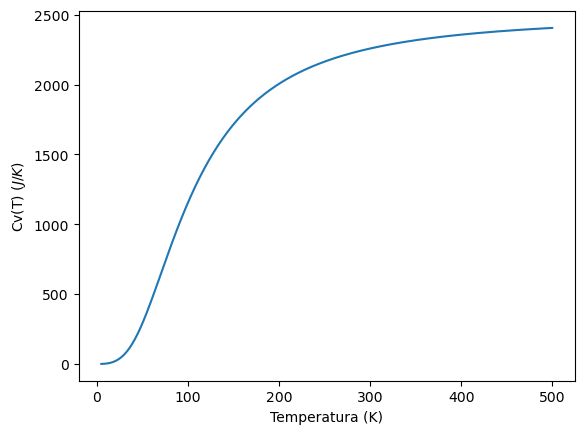

In [48]:

from scipy.special import roots_legendre
from scipy.special import legendre

N=50
raices, pesos= roots_legendre(N) #obtenemos dos arreglos quwe contienen las raices y los pesos normales del polinomo de legendre de grado 50 
def wkprim(a,b,k): #esta función nos da los pesos primados (reescalados)
    
    pesos1=[]
    for i in pesos:
        pesos1.append(float(i))  #aquí convertimos los pesos normales en en flotantes y los agregamos a una lista pesos1
    wk_p=(b-a)/2*pesos1[k-1] #aquí obtenemos ahora sí el peso primado
    return wk_p


    
 #Ahora sí calculamos la integral por la cuadrtura de Gauss   
def cuadgauss(a,b):
    raices1=[] 
    for xk in raices:
        raices1.append((b-a)/2*float(xk)+1/2*(b+a)) #En la lista raices1 agregamos todas las raices ya reescaladas (las Xk')
    sum=0

    for xkp in raices1:
        fx=xkp**4*(np.e)**xkp/((np.e)**xkp-1)**2 #la función original evaluada en los puntos xkp (Xk')
        phi=wkprim(a,b,raices1.index(xkp)+1)*fx  #se hace el producto de (Wk')*(f(Xk'))
        sum+=phi #se reaiza la suma
    return sum #Nos regresa la aproximación por cuadratura de gauss de la integral 
        
      

def Cv(T): #Esta  función nos regresa el calor específico considerando la fórmula y datos de arriba
    k=1.380649e-23
    Debye=428
    a=0
    b=Debye/T
    p=6.022e28
    V=0.001
    return 9*V*p*k*(1/b)**3*cuadgauss(a,b) 


Cvlista=[] #definimosuna lista vacía donde agregaremos todos los valores de Cv
temp=range(5,501)
for t in temp: #evaluamos Cv para las temperaturas T en el rango de 5 a 500 (se pone 501 para incluir al 500)
    Cvlista.append(Cv(t)) #agregamos los dintintos valores de Cv a la lista Cvlista
#Aquí generamos la gráfica
plt.plot(temp, Cvlista)
plt.xlabel('Temperatura (K)')
plt.ylabel('Cv(T) ($J/K$)')
    
    
    

### 4. Atracción gravitacional de una lámina uniforme
### Una lámina de metal cuadrada uniforme flota inmóvil en el espacio. La lamina mide 10 m de lado, tiene un espesor insignificante y una masa de 10 toneladas. (a) Considera la fuerza gravitacional debida a la placa que siente una masa puntual de 1 kg a una distancia z del centro del cuadrado, en direccion perpendicular a la lamina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje z es:
$$
F_z=G\sigma z \int\int_{-L/2}^{L/2}\frac{dxdy}{(x^2+y^2+z^2)^{3/2}}
$$

### donde G = 6.674 × 10−11 m3 kg−1 s−2 es la constante gravitacional de Newton y σ es la masa por unidad de area de la hoja.

### (b) Escribe un programa para calcular y graficar la fuerza en funcion de z de z = 0 hasta z = 10 m. Para la integral doble utiliza la cuadratura Gaussiana (doble):
$$
I \approx \sum_{i=1}^{N}\sum_{j=1}^N\omega_i\omega_jf(x_i,x_j)
$$
### con 100 puntos de muestra a lo largo de cada eje.

Text(0, 0.5, '$F(z)$')

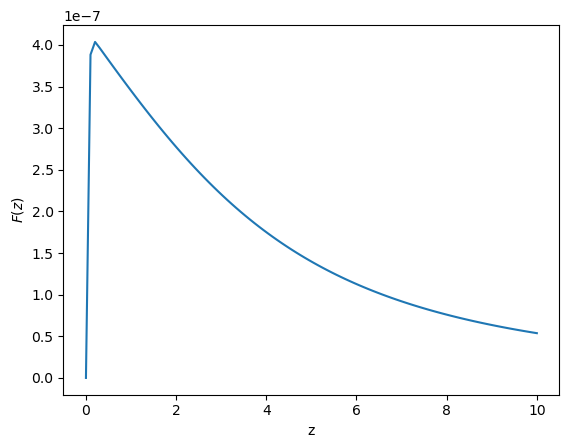

In [51]:
from scipy.special import roots_legendre
from scipy.special import legendre

N=100
raices, pesos= roots_legendre(N) #obtenemos dos arreglos quwe contienen las raices y los pesos normales del polinomo de legendre de grado 50 
def wkprim(a,b,k): #esta función nos da los pesos primados (reescalados)
    
    pesos1=[]
    for i in pesos:
        pesos1.append(float(i))  #aquí convertimos los pesos normales en en flotantes y los agregamos a una lista pesos1
    wk_p=(b-a)/2*pesos1[k-1] #aquí obtenemos ahora sí el peso primado
    return wk_p


def cuadgauss(a,b,z): #Modifiqué la función cuadgauss que hice para ejercicio anterior
    raices1=[] 
    for xk in raices:
        raices1.append((b-a)/2*float(xk)+1/2*(b+a)) #En la lista raices1 agregamos todas las raices ya reescaladas (las Xk')
    sum1=0 #esta primera suma es la que nos dará la aproximación a la doble integral
    for y in raices1:
        sum2=0 #esta suma nos dará lo relacionado con la primera integral (respecto de x)
        for xkp in raices1: #para el valor en turno de y, se comienza la aproximación de la primera integral (la de x)
            fx=1/(xkp**2+y**2+z**2)**(3/2) #la función original evaluada en los puntos xkp (Xk')
            phi=wkprim(a,b,raices1.index(xkp)+1)*fx  #se hace el producto de (Wk')*(f(Xk'))
            sum2+=phi #se reaiza la suma
        sum1+=wkprim(a,b,raices1.index(y)+1)*sum2 #una vez hecha la suma para un solo valor de y y todos los de x, multiplicamos lo anterior por el
                                                #peso correspondiente a la y en turno y eso lo sumamos a sum1
    return sum1 #Nos regresa la aproximación por cuadratura de gauss de la doble integral 

G=6.674e-11 
densidad=100000/(10*10)
val_z=np.linspace(0,10,100)
fuerza_z=[] #definimos una lista vacia que dsspués tendrá todos los valores de la fuerza dpendiendo de la z
for z in val_z:
    fuerza_z.append(G*densidad*z*cuadgauss(-5,5,z)) #a la lista fuerza_z se le va agegando cada valor de Fz

plt.plot(val_z,fuerza_z)
plt.xlabel('z')
plt.ylabel('$F(z)$')
    
    
    
    


### (c) Deberías ver una curva suave, excepto en valores muy pequenos de z, donde la fuerza debería caer repentinamente a cero. Esta caída no es un efecto real, sino un artefacto de la forma en que hemos realizado el cálculo. Explica brevemente de dónde viene este artefacto y sugiere una estrategia para eliminarlo, o al menos disminuir su tamaño.

#### El artefacto que se menciona viene porque para valores muy pequeños de z, la función en la integral se vuelve muy sensible a errores numéricos y a la discretización de la cuadratura Gaussiana. Una razón podría ser le hecho de que 100 puntos sean muy pocos puntos de prueba y también podría ser que los puntos de la cuadratura de Gauss en z cercano a cero no estimen correctamente la función. 

#### Alguna estrategia para  eliminar o mitigar este problema podría ser el usar más puntos prueba o usar otro método de aproximación de integrales.